In [596]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

import gmaps
import gmaps.datasets

In [571]:
crime_data = pd.read_csv("neighborhood_crime_aug.csv")
for index, row in neighborhood_crime.iterrows():
    crime_data.loc[index, 'Neighborhood'] = row['Neighborhood'].strip()
crime_data.head()

,Unnamed: 0,Date (Year/Month),Type of Crime,Latitude,Longitude,Neighborhood
0,0,2019-08,BATTERY,41.646959,-87.543958,Albany Park
1,1,2019-08,MOTOR VEHICLE THEFT,41.646995,-87.544005,Andersonville
2,2,2019-08,BATTERY,41.647038,-87.615951,Archer Heights
3,3,2019-08,OTHER OFFENSE,41.648443,-87.545864,Armour Square
4,4,2019-08,THEFT,41.649379,-87.545930,Ashburn


In [572]:
grouped_crime = crime_data.groupby('Neighborhood')
crime_count = grouped_crime['Neighborhood'].count()
crime_count = pd.DataFrame(grouped_crime['Neighborhood'].count())
crime_count.head()

,Neighborhood
Neighborhood,
10000,14
Albany Park,170
Alsip,2
Altgeld Gardens,36
Andersonville,49


In [573]:
renamed_crime_count = crime_count.rename(columns={"Neighborhood": "Crime Count"})
renamed_crime_count.reset_index(level=0, inplace=True)
renamed_crime_count.head(10)

,Neighborhood,Crime Count
0,10000,14
1,Albany Park,170
2,Alsip,2
3,Altgeld Gardens,36
4,Andersonville,49
5,Arcadia Terrace,23
6,Archer Heights,73
7,Armour Square,66
8,Ashburn,132
9,Auburn Gresham,709


In [574]:
renamed_crime_count.dtypes

Neighborhood    object
Crime Count      int64
dtype: object

In [575]:
redfin_data = pd.read_csv('Neighborhood_LatLng.csv')
for index, row in redfin_data.iterrows():
    redfin_data.loc[index, 'Neighborhood'] = row['Neighborhood'].strip()
    redfin_data.loc[index, 'Homes Sold'] = row['Homes Sold'].replace(',', '')
    redfin_data.loc[index, 'New Listings'] = row['New Listings'].replace(',', '')
redfin_data['New Listings'] = pd.to_numeric(redfin_data['New Listings'])
redfin_data['Homes Sold'] = pd.to_numeric(redfin_data['Homes Sold'])
redfin_data.head()

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,295.0,113,133,54
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,419.0,94,79,50
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226.0,20,31,26
3,"Chicago, IL",Archer Highlands,41.878114,-87.629798,Aug-19,210.0,3,5,21
4,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265.0,7,20,58


In [576]:
redfin_data.dtypes

City               object
Neighborhood       object
Lat               float64
Lng               float64
Month              object
Sale Price        float64
Homes Sold          int64
New Listings        int64
Days on Market      int64
dtype: object

In [577]:
#redfin_data['Neighborhood'] = redfin_data['Neighborhood'].astype(str)
#redfin_data.dtypes

In [578]:
#renamed_crime_count['Neighborhood'] = renamed_crime_count['Neighborhood'].astype(str)
#renamed_crime_count.dtypes

In [579]:
neighborhood_crime = redfin_data.merge(renamed_crime_count, how='inner', on='Neighborhood')
neighborhood_crime.head(50)

,City,Neighborhood,Lat,Lng,Month,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
0,"Chicago, IL",Albany Park,41.968327,-87.728028,Aug-19,295.0,113,133,54,170
1,"Chicago, IL",Andersonville,41.981658,-87.668476,Aug-19,419.0,94,79,50,49
2,"Chicago, IL",Archer Heights,41.807900,-87.723585,Aug-19,226.0,20,31,26,73
3,"Chicago, IL",Armour Square,41.840755,-87.634019,Aug-19,265.0,7,20,58,66
4,"Chicago, IL",Ashburn,41.749690,-87.712007,Aug-19,199.0,100,137,53,132
5,"Chicago, IL",Auburn Gresham,41.743377,-87.656199,Aug-19,165.0,131,190,65,709
6,"Chicago, IL",Austin,41.894871,-87.765401,Aug-19,206.0,202,277,53,1228
7,"Chicago, IL",Avalon Park,41.744202,-87.585576,Aug-19,167.0,38,59,69,1
8,"Chicago, IL",Avondale,41.941501,-87.702502,Aug-19,443.0,112,121,49,182
9,"Chicago, IL",Back of the Yards,41.806677,-87.667976,Aug-19,115.0,73,123,53,329


In [580]:
neighborhood_crime = neighborhood_crime.loc[neighborhood_crime["Crime Count"]>2]
neighborhood_crime = neighborhood_crime.loc[neighborhood_crime["Crime Count"]<1000]
print((neighborhood_crime["Sale Price"] * neighborhood_crime["Homes Sold"]).sum()/neighborhood_crime["Homes Sold"].sum())

330.2822157961323


In [581]:
neighborhood_crime.to_csv("Combined_neighborhood_crime_data.csv")

In [582]:
crime = neighborhood_crime.iloc[:,9]
sale_price = neighborhood_crime.iloc[:,5]
homes_sold = neighborhood_crime.iloc[:,6]
new_listings = neighborhood_crime.iloc[:,7]
days_on_market = neighborhood_crime.iloc[:,8]

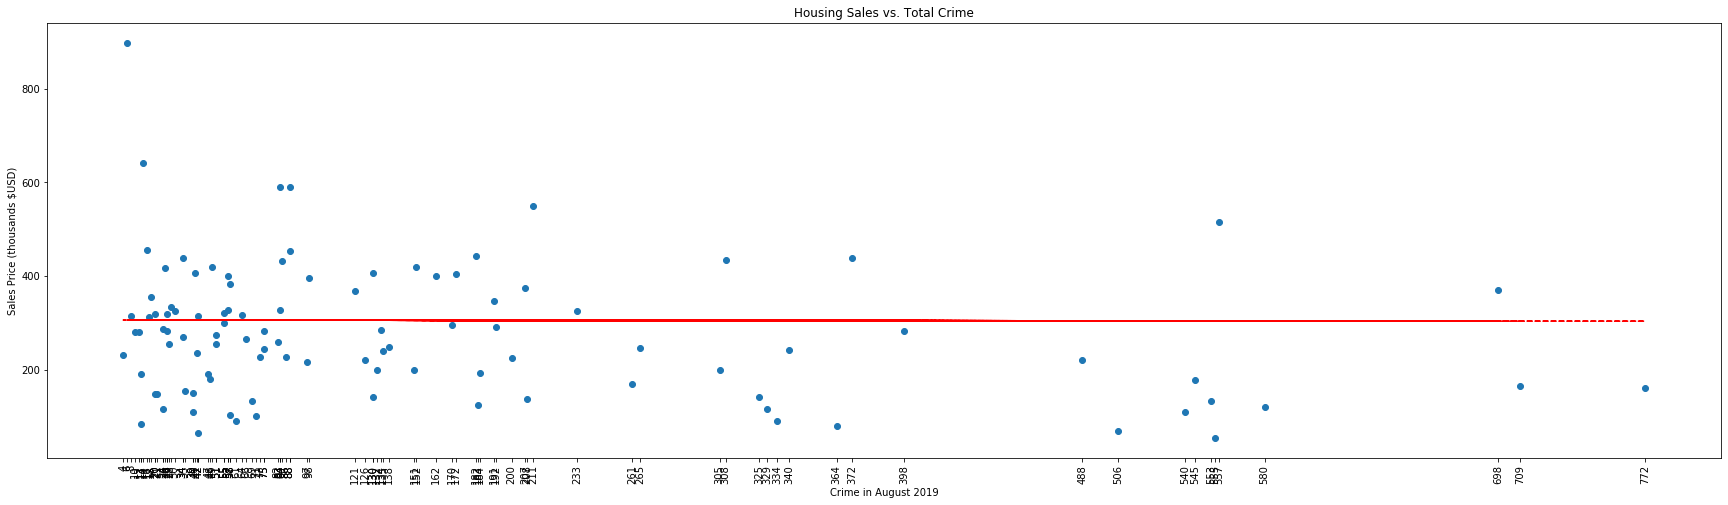

<Figure size 360x2160 with 0 Axes>

In [583]:
sp_vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime, sale_price)

sp_vc_fit = vc_slope * crime + vc_int

plt.scatter(crime, sale_price)
plt.plot(crime,sp_vc_fit,"--", color="r")
fig = plt.gcf()
fig.set_size_inches(30,8)
plt.xticks(crime, rotation=90)
plt.xlabel('Crime in August 2019')
plt.ylabel('Sales Price (thousands $USD)')
plt.title('Housing Sales vs. Total Crime')
plt.savefig('crime_housingsales_regression.png')
plt.show()
plt.tight_layout()

In [584]:
print(vc_int)
print(vc_slope)

305.9404756277816
-0.0033697046965960103


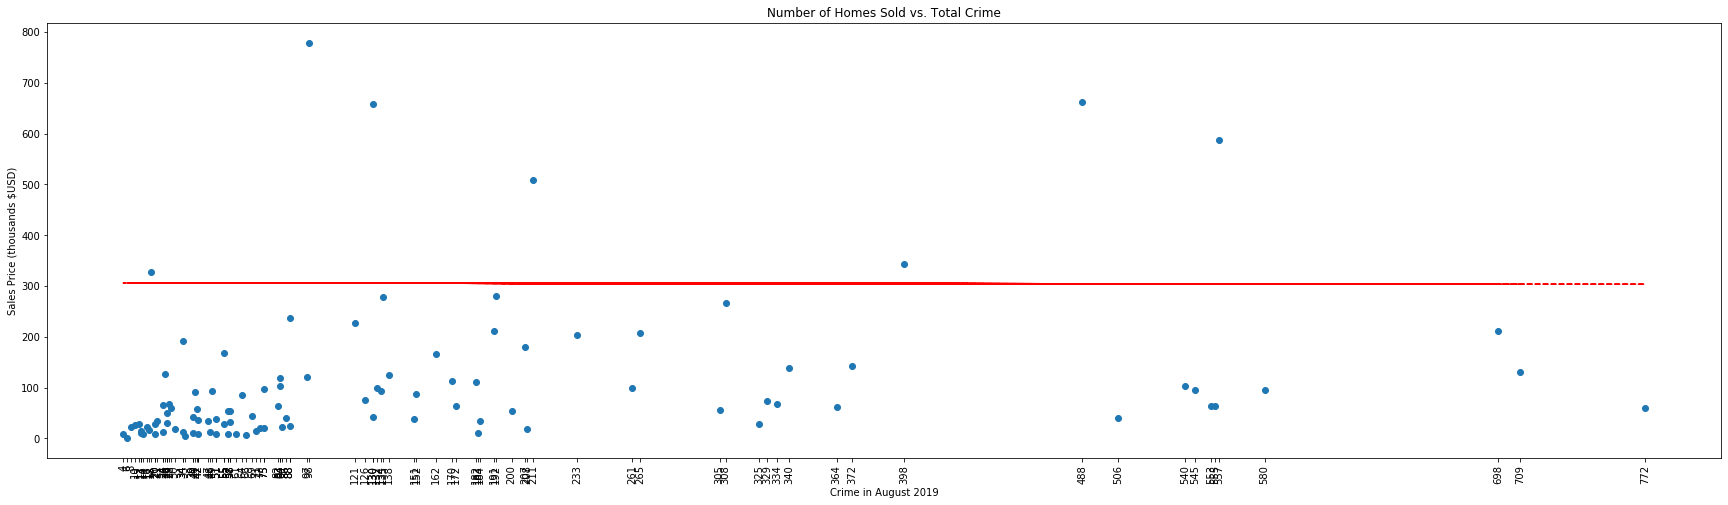

In [585]:
hs_vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime, homes_sold)

hs_vc_fit = vc_slope * crime + vc_int

plt.scatter(crime, homes_sold)
plt.plot(crime,sp_vc_fit,"--", color="r")
#plt.rcParams["figure.figsize"] = [5, 30]
fig = plt.gcf()
fig.set_size_inches(30,8)
plt.xticks(crime, rotation=90)
plt.xlabel('Crime in August 2019')
plt.ylabel('Sales Price (thousands $USD)')
plt.title('Number of Homes Sold vs. Total Crime')
plt.savefig('crime_homessold_regression.png')
plt.show()

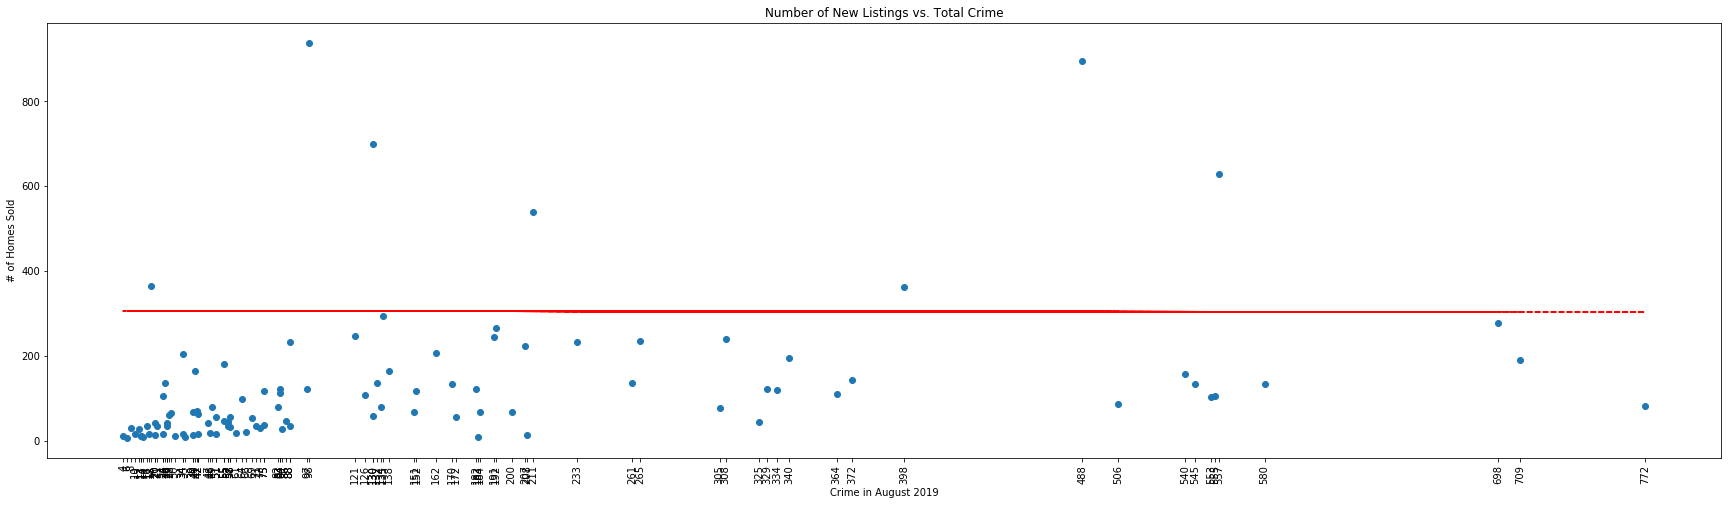

In [586]:
nl_vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime, new_listings)

nl_vc_fit = vc_slope * crime + vc_int

plt.scatter(crime, new_listings)
plt.plot(crime,sp_vc_fit,"--", color="r")
plt.xticks(crime, rotation=90)
fig = plt.gcf()
fig.set_size_inches(30,8)
plt.xlabel('Crime in August 2019')
plt.ylabel('# of Homes Sold')
plt.title('Number of New Listings vs. Total Crime')
plt.savefig('crime_newlistings_regression.png')
plt.show()

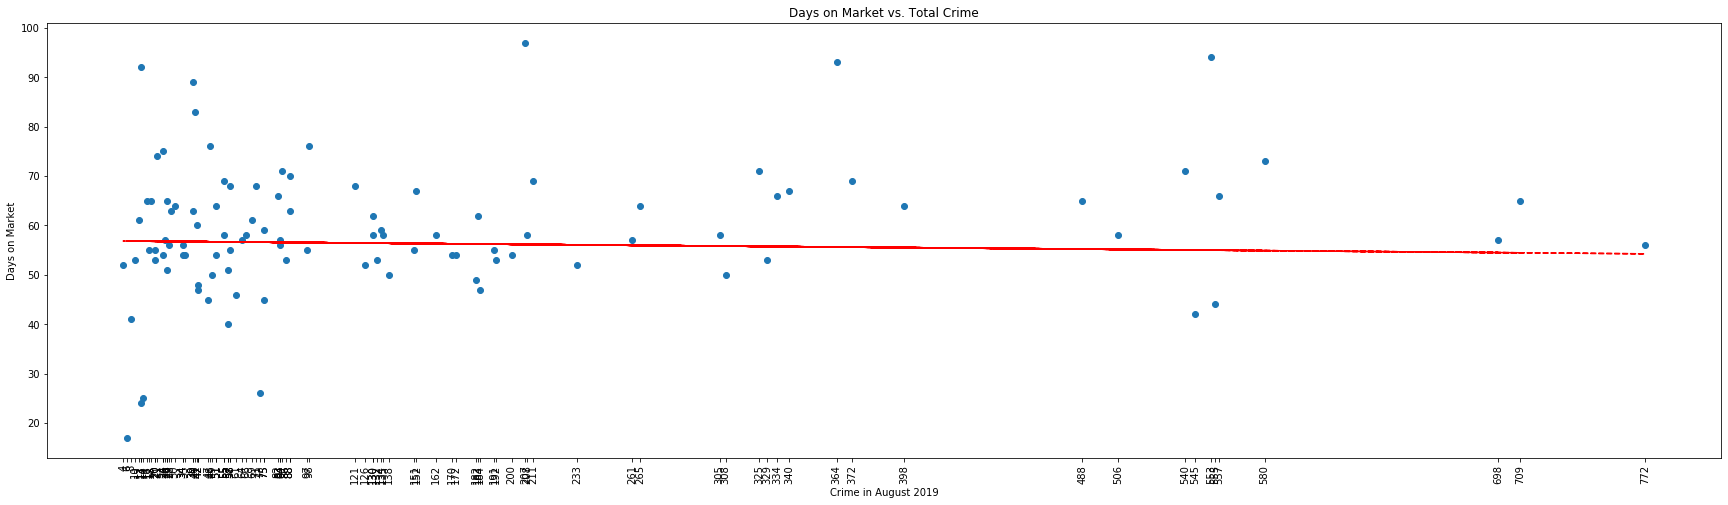

In [587]:
dom_vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(crime, days_on_market)

dom_vc_fit = vc_slope * crime + vc_int

plt.scatter(crime, days_on_market)
plt.plot(crime,dom_vc_fit,"--", color="r")
plt.xticks(crime, rotation=90)
fig = plt.gcf()
fig.set_size_inches(30,8)
plt.xlabel('Crime in August 2019')
plt.ylabel('Days on Market')
plt.title('Days on Market vs. Total Crime')
plt.savefig('crime_daysonmarket_regression.png')
plt.show()

In [588]:
correlation1 = stats.pearsonr(crime,sale_price)
correlation2 = stats.pearsonr(crime,homes_sold)
correlation3 = stats.pearsonr(crime,new_listings)
correlation4 = stats.pearsonr(crime,days_on_market)
print(f"The correlation between Sales Price and Crime is {round(correlation1[0],2)}")
print(f"The correlation between Homes Sold and Crime is {round(correlation2[0],2)}")
print(f"The correlation between New Listings and Crime is {round(correlation3[0],2)}")
print(f"The correlation between Days on Market and Crime is {round(correlation4[0],2)}")


The correlation between Sales Price and Crime is -0.23
The correlation between Homes Sold and Crime is 0.29
The correlation between New Listings and Crime is 0.34
The correlation between Days on Market and Crime is 0.18


In [592]:
corr = neighborhood_crime.corr()
corr.style.background_gradient(cmap='coolwarm')
#plt.savefig('neighborhood_crime_regression_heatmap.png')

,Lat,Lng,Sale Price,Homes Sold,New Listings,Days on Market,Crime Count
Lat,1,-0.562814,0.658264,0.23952,0.179587,-0.223435,-0.191425
Lng,-0.562814,1,-0.269793,0.050795,0.0805548,0.354319,0.185343
Sale Price,0.658264,-0.269793,1,0.282313,0.225716,-0.175241,-0.22871
Homes Sold,0.23952,0.050795,0.282313,1,0.987709,0.192106,0.287247
New Listings,0.179587,0.0805548,0.225716,0.987709,1,0.214794,0.336197
Days on Market,-0.223435,0.354319,-0.175241,0.192106,0.214794,1,0.181154
Crime Count,-0.191425,0.185343,-0.22871,0.287247,0.336197,0.181154,1


In [593]:
locations = neighborhood_crime[["Lat", "Lng"]]
crime = neighborhood_crime["Crime Count"]

In [595]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
markers = gmaps.marker_layer(locations)
heat_layer = gmaps.heatmap_layer(locations, weights=crime, 
                                 dissipating=False, max_intensity=500,
                                 point_radius=.01)


# Add layer
#fig.add_layer(markers)
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))